In [1]:
import sys
from pathlib import Path
project_root = Path().resolve().parent.parent  
sys.path.append(str(project_root))


In [3]:
from langgraph.graph import StateGraph
from backend.model.data_class.PipelineState import PipelineState
from backend.nodes.extract_pdf_to_chunk import extract_pdf_to_chunk
from backend.nodes.get_pdf_summary import get_pdf_summary
from backend.nodes.chat_agent import chat_agent
from IPython.display import Image, display




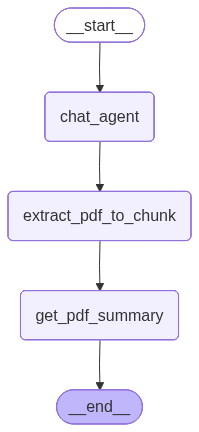

In [5]:
graph = StateGraph(PipelineState)
graph.add_node("chat_agent", chat_agent)
graph.add_node("extract_pdf_to_chunk", extract_pdf_to_chunk)
graph.add_node("get_pdf_summary", get_pdf_summary)

graph.add_edge("chat_agent", "extract_pdf_to_chunk")
graph.add_edge("extract_pdf_to_chunk", "get_pdf_summary")

graph.set_entry_point("chat_agent")
graph.set_finish_point("get_pdf_summary")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))